# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm


Load feature names.

In [5]:
feature_names = []
with open('C:\Megan\Education\Berkeley\W207\w207-Projects\Project 3\mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))
print(feature_names)

Loaded feature names: 126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-colo

Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [7]:
X, Y = [], []

with open('C:\Megan\Education\Berkeley\W207\w207-Projects\Project 3\mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [8]:
def P1():
### STUDENT START ###
    # for k in range 1 to 50, run a PCA model and sum up the explained valiance for each iteration
    for k in range(1,51):
        pca = PCA(n_components=k)
        pca.fit(train_data)
        print('Fraction of total variance explained by the first %d components: %f' % (k,sum(pca.explained_variance_ratio_)))
    
### STUDENT END ###
    
P1()

Fraction of total variance explained by the first 1 components: 0.164043
Fraction of total variance explained by the first 2 components: 0.297278
Fraction of total variance explained by the first 3 components: 0.399013
Fraction of total variance explained by the first 4 components: 0.469646
Fraction of total variance explained by the first 5 components: 0.508313
Fraction of total variance explained by the first 6 components: 0.545121
Fraction of total variance explained by the first 7 components: 0.576403
Fraction of total variance explained by the first 8 components: 0.603741
Fraction of total variance explained by the first 9 components: 0.629905
Fraction of total variance explained by the first 10 components: 0.652215
Fraction of total variance explained by the first 11 components: 0.672697
Fraction of total variance explained by the first 12 components: 0.691380
Fraction of total variance explained by the first 13 components: 0.708724
Fraction of total variance explained by the fir

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

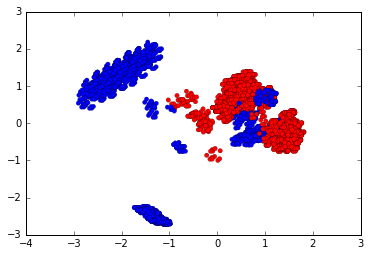

In [9]:
def P2():
### STUDENT START ###
    # Create a PCA model
    pca = PCA(n_components=2)
    # Fit the PCA model on the training data and transform it to a new dataset
    train_tx = pca.fit_transform(train_data)
    # Split the train_tx data in to the x values and the y values for plotting
    x, y = np.split(train_tx, 2, axis=1)
    # Create a colors list.  If the sample is poisonous (label=1), then set the color to 'b'
    # otherwise set it to 'r'.
    colors = ['b' if label == 1 else 'r' for label in train_labels]
    # Create a scatter plot of the all the sample points and color them according to the colors list
    plt.scatter(x, y, c=colors, lw=.2)
    # Display the plot
    plt.show()
    
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

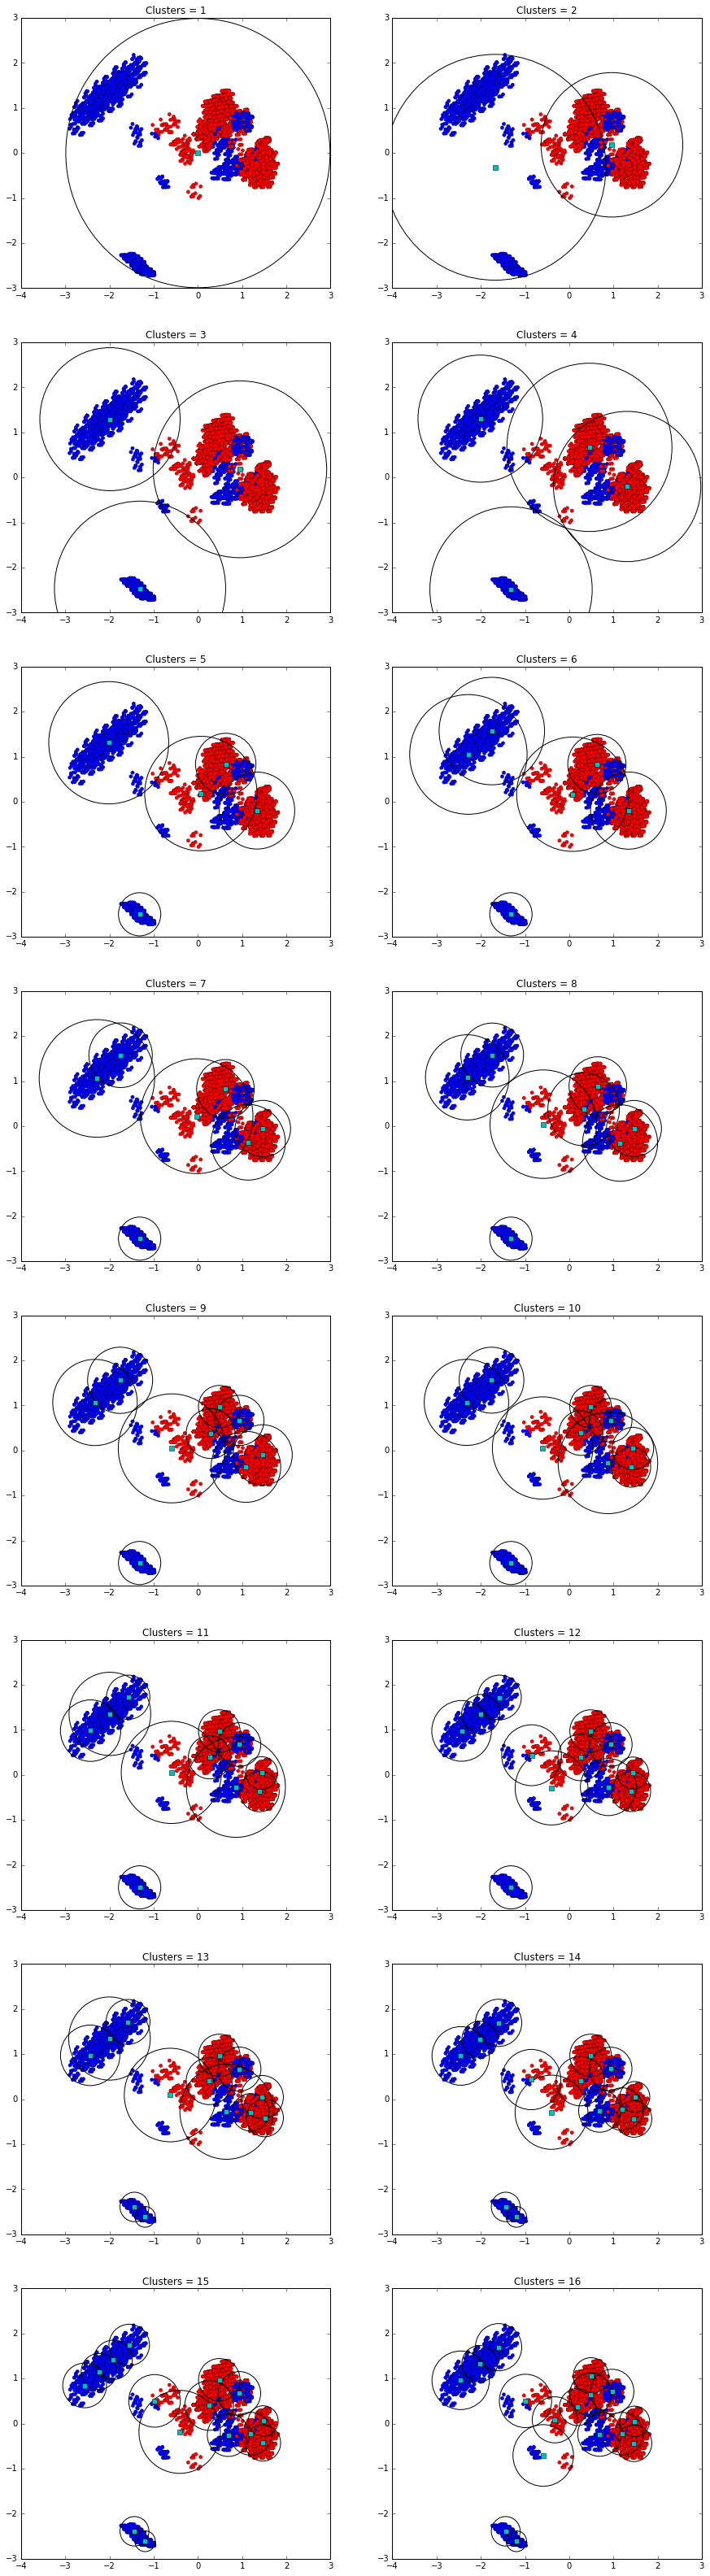

In [10]:
def P3():
### STUDENT START ###
    # Create a PCA model
    pca = PCA(n_components=2)
    # Fit the PCA model on the training data and transform it to a new dataset
    train_tx = pca.fit_transform(train_data)
    # Split the train_tx data in to the x values and the y values for plotting
    x, y = np.split(train_tx, 2, axis=1)
    # Create a colors list.  If the sample is poisonous (label=1), then set the color to 'b'
    # otherwise set it to 'r'.
    colors = ['b' if label == 1 else 'r' for label in train_labels]

    # Create a figure to display all of the subplots
    plt.figure(figsize=(15,56))
    
    # For each desired k value 1 to 16.
    for k in range(1,17):
        # Create a KMeans model with k clusters
        km = KMeans(n_clusters=k)
        # Fit the model to the reduced training data
        km.fit(train_tx)
        # Initialize a distances list to store the distance of the point that is furthest from the centroid
        distances = [0] * k
        # Loop through the training data and for each point calculate its distance from the centroid of the cluster
        # that its assigned to.  If this distance is further than the distance that is already stored for that cluster
        # then update that cluster's greatest distance.
        for i in range(len(train_tx)):
            point = train_tx[i]
            cluster = km.labels_[i]
            center = km.cluster_centers_[cluster]
            distance = pow((pow(point[0]-center[0], 2)+pow(point[1]-center[1], 2)), 0.5)
            if distance > distances[cluster]:
                distances[cluster] = distance
        # Split the cluster_centers data in to the x values and the y values for plotting
        centroids_x, centroids_y = np.split(km.cluster_centers_, 2, axis=1)
        
        # Create a subplot space 8 high and 2 wide.  This subplot will go in space k.
        plt.subplot(8, 2, k)
        # Add a title to the subplot showing the number of clusters.
        plt.title('Clusters = ' + str(k))
        # Add a scatter plot of the all the sample points and color them according to the colors list
        plt.scatter(x, y, c=colors, lw=0.2)
        # Add a plot of the centroids of the clusters.  Make the points black squares.
        plt.plot(centroids_x, centroids_y, 'cs')
        # For each cluster, add a circle to the plot that has a center equal to the centroid of the cluster
        # and a radius equal to the distance of the furthest point in the cluster from the centroid.
        for i in range(k):
            center = km.cluster_centers_[i]
            radius = distances[i]
            circle=plt.Circle(center, radius, color='k', fill=False)
            plt.gcf().gca().add_artist(circle)
    
    # Display the plot
    plt.show()

### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

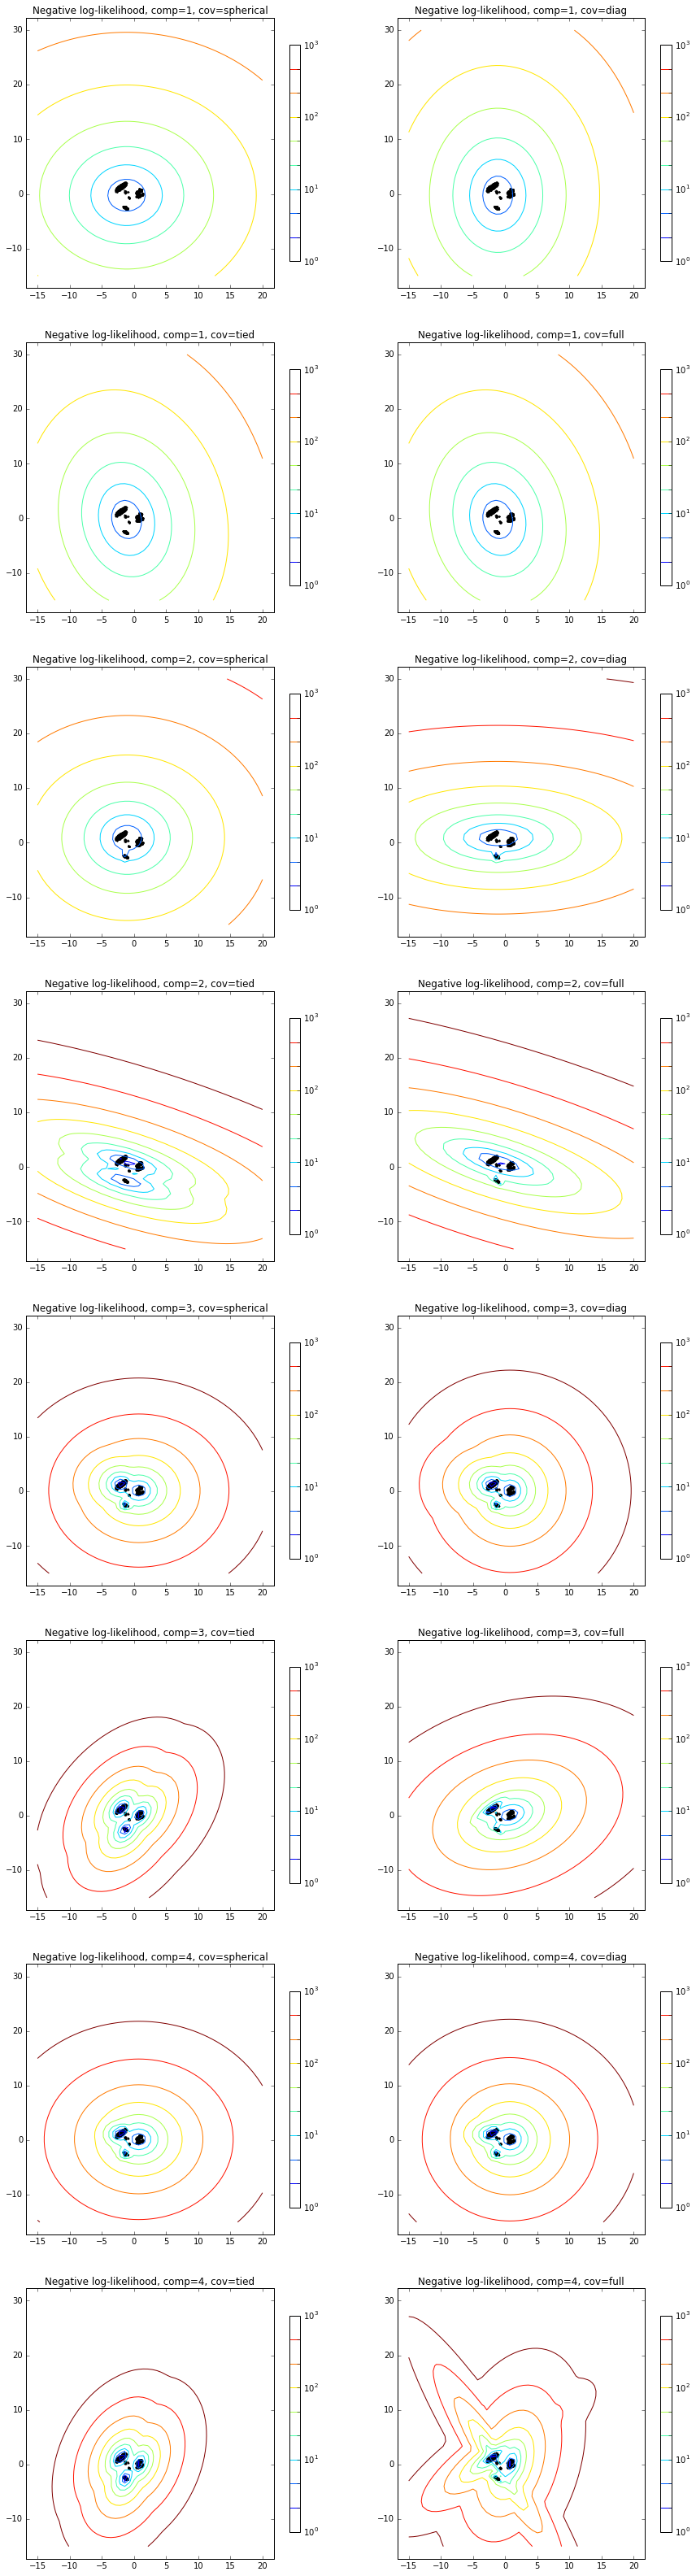

In [37]:
def P4():
### STUDENT START ###
    # Create a PCA model
    pca = PCA(n_components=2)
    # Fit the PCA model on the training data and transform it to a new dataset
    train_tx = pca.fit_transform(train_data)
    
    positives = []
    for i in range(len(train_labels)):
        if train_labels[i] == 1:
            positives.append(train_tx[i])
    positives = np.asarray(positives)
    
    # Create a figure to display all of the subplots
    plt.figure(figsize=(15,56))

    # display predicted scores by the model as a contour plot
    x = np.linspace(-15.0, 20.0)
    y = np.linspace(-15.0, 30.0)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T

    plot_index = 1
    for i in range(1,5):
        for j in ['spherical', 'diag', 'tied', 'full']:
            # Create a subplot space 8 high and 2 wide.  This subplot will go in space k.
            plt.subplot(8, 2, plot_index)
            # Add a title to the subplot showing the number of clusters.
            plt.title('Negative log-likelihood, comp=%d, cov=%s' % (i, j))

            # fit a Gaussian Mixture Model with two components
            gmm1 = GMM(n_components=i, covariance_type=j)
            gmm1.fit(positives)

            Z = -gmm1.score_samples(XX)[0]
            Z = Z.reshape(X.shape)
            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(positives[:, 0], positives[:, 1], .8)
            plt.axis('tight')
            plot_index += 1
    plt.show()

### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [54]:
def P5():
### STUDENT START ###
    # Create a PCA model
    pca = PCA(n_components=2)
    # Fit the PCA model on the training data and transform it to a new dataset
    train_tx = pca.fit_transform(train_data)
    test_tx = pca.fit_transform(test_data)
    
    positives = []
    negatives = []
    for i in range(len(train_labels)):
        if train_labels[i] == 1:
            positives.append(train_tx[i])
        else:
            negatives.append(train_tx[i])
    positives = np.asarray(positives)
    negatives = np.asarray(negatives)

    # fit a Gaussian Mixture Model with two components
    gmm1 = GMM(n_components=4, covariance_type='full')
    gmm1.fit(positives)
    predict_pos = gmm1.score(test_tx)
    print(predict_pos.shape)
    print(predict_pos)

    gmm1.fit(negatives)
    predict_neg = gmm1.score(test_tx)
    print(predict_neg.shape)
    print(predict_neg)
    
    correct = 0
    total = test_labels.shape[0] 
    predict = [1 if predict_pos[i] > predict_neg[i] else 0 for i in range(total)]
    accuracy = sum(predict == test_labels)/total
    print(accuracy)
    
### STUDENT END

P5()

(1124,)
[ -5.09657462  -6.82388463  -5.32667569 ..., -50.71334606  -8.15348952
 -14.06314277]
(1124,)
[ -6.91081065 -10.06748177  -6.12833592 ..., -16.77889055  -2.00891184
 -18.67472183]
0.512455516014


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [6]:
#def P6():
### STUDENT START ###

### STUDENT END ###

#P6()